In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import regularizers
tf.__version__

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

from sklearn.model_selection import train_test_split

In [2]:
import scipy
scipy.__version__

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

In [3]:
#!pip install camb

import camb
from camb import model, initialpower

kmin = 1e-4
kmax = 15

(8000, 500)
(8000, 1)
55.000137 84.9965


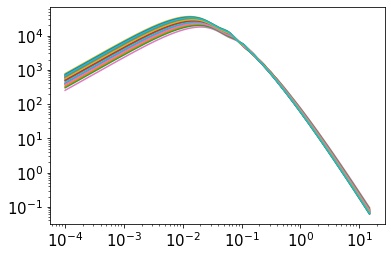

In [4]:
with np.load('../data/input_pk_h0.npy') as data:
    h_lhs = data['H']
    kh = data['k']
    input_pk = data['pk']

print(np.shape(input_pk))
print(np.shape(h_lhs))

for i in range(20):
  plt.loglog(kh, input_pk[i])    

Npoints = len(input_pk[0])  
print(h_lhs.min(), h_lhs.max())

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

xscaler = StandardScaler() #MinMaxScaler()
yscaler = StandardScaler() #MinMaxScaler()

scaled_input = xscaler.fit(h_lhs)
scaled_output = yscaler.fit(input_pk)

norm_x = scaled_input.transform(h_lhs)                               
norm_y = scaled_output.transform(input_pk)

print(norm_x.min(), norm_x.max())

norm_x = pd.DataFrame(norm_x)
norm_y = pd.DataFrame(norm_y)

-1.7320349 1.7316436


In [6]:
x_train, x_test, y_train, y_test = train_test_split(norm_x,
                                                    norm_y,
                                                    test_size=0.2,
                                                    random_state=1273)

np.shape(y_test), np.shape(y_train), np.shape(x_test), np.shape(x_train)

((800, 500), (7200, 500), (800, 1), (7200, 1))

In [24]:
# Working model

input_dim = x_train.shape[1]
output_dim = Npoints

model_nn = Sequential()
model_nn.add(Dense(units=200, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
#model_nn.add(Dropout(0.2))
model_nn.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
model_nn.add(Dropout(0.1))
model_nn.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
model_nn.add(Dropout(0.1))
model_nn.add(Dense(output_dim, kernel_initializer='normal'))

model_nn.summary()


initial_learning_rate = 7e-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.1,
    staircase=True)

#model_nn.compile(loss="mae")
model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
                 loss="mean_squared_error",
                 metrics="Accuracy")
                 #loss=tf.keras.losses.MeanSquaredLogarithmicError())
                 #loss="kl_divergence")
history_nn = model_nn.fit(x_train, y_train, batch_size=50, epochs=250, verbose=1, validation_split=0.2) #validation_data=(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 500)               100500    
Total params: 181,300
Trainable params: 181,300
Non-trainable params: 0
________________________________________________

Epoch 47/250
116/116 [==============================] - 1s 10ms/step - loss: 0.0056 - accuracy: 6.5238e-07 - val_loss: 4.2179e-04 - val_accuracy: 0.0000e+00
Epoch 48/250
116/116 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 9.8694e-04 - val_accuracy: 1.3889e-06
Epoch 49/250
116/116 [==============================] - 2s 15ms/step - loss: 0.0048 - accuracy: 4.1388e-07 - val_loss: 0.0027 - val_accuracy: 1.3889e-06
Epoch 50/250
116/116 [==============================] - 3s 29ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 51/250
116/116 [==============================] - 3s 27ms/step - loss: 0.0049 - accuracy: 5.3495e-08 - val_loss: 9.8595e-04 - val_accuracy: 0.0000e+00
Epoch 52/250
116/116 [==============================] - 4s 31ms/step - loss: 0.0048 - accuracy: 1.0308e-06 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 53/250
116/116 [==============================] - 4s 34ms/step - 

116/116 [==============================] - 3s 23ms/step - loss: 0.0039 - accuracy: 4.8060e-07 - val_loss: 0.0028 - val_accuracy: 2.7778e-06
Epoch 101/250
116/116 [==============================] - 3s 29ms/step - loss: 0.0047 - accuracy: 1.7738e-06 - val_loss: 0.0027 - val_accuracy: 1.3889e-06
Epoch 102/250
116/116 [==============================] - 3s 29ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 8.1600e-04 - val_accuracy: 0.0000e+00
Epoch 103/250
116/116 [==============================] - 3s 30ms/step - loss: 0.0056 - accuracy: 1.4361e-06 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 104/250
116/116 [==============================] - 4s 30ms/step - loss: 0.0047 - accuracy: 3.1341e-07 - val_loss: 0.0016 - val_accuracy: 2.7778e-06
Epoch 105/250
116/116 [==============================] - 3s 29ms/step - loss: 0.0044 - accuracy: 1.0484e-06 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 106/250
116/116 [==============================] - 3s 26ms/step - loss: 0.0051 -

Epoch 153/250
116/116 [==============================] - 3s 27ms/step - loss: 0.0046 - accuracy: 8.8176e-07 - val_loss: 0.0025 - val_accuracy: 1.3889e-06
Epoch 154/250
116/116 [==============================] - 3s 28ms/step - loss: 0.0052 - accuracy: 1.1907e-08 - val_loss: 6.8250e-04 - val_accuracy: 0.0000e+00
Epoch 155/250
116/116 [==============================] - 3s 27ms/step - loss: 0.0046 - accuracy: 3.0271e-06 - val_loss: 8.2587e-04 - val_accuracy: 0.0000e+00
Epoch 156/250
116/116 [==============================] - 3s 27ms/step - loss: 0.0045 - accuracy: 9.0222e-07 - val_loss: 6.5127e-04 - val_accuracy: 0.0000e+00
Epoch 157/250
116/116 [==============================] - 3s 28ms/step - loss: 0.0047 - accuracy: 9.4160e-07 - val_loss: 0.0012 - val_accuracy: 1.3889e-06
Epoch 158/250
116/116 [==============================] - 3s 26ms/step - loss: 0.0043 - accuracy: 2.2528e-06 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 159/250
116/116 [==============================] - 3s 30ms

Epoch 206/250
116/116 [==============================] - 4s 30ms/step - loss: 0.0056 - accuracy: 1.1245e-06 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 207/250
116/116 [==============================] - 4s 30ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 1.1111e-05
Epoch 208/250
116/116 [==============================] - 3s 28ms/step - loss: 0.0047 - accuracy: 3.7275e-07 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 209/250
116/116 [==============================] - 3s 28ms/step - loss: 0.0054 - accuracy: 5.8137e-08 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 210/250
116/116 [==============================] - 4s 33ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 211/250
116/116 [==============================] - 3s 28ms/step - loss: 0.0056 - accuracy: 1.9985e-07 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 212/250
116/116 [==============================] - 3s 29ms/step - loss

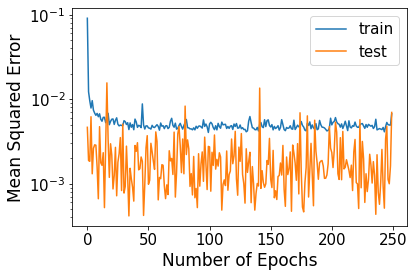

In [25]:
plt.plot(history_nn.history["loss"], label="train")
plt.plot(history_nn.history["val_loss"], label="test")
#plt.xlim([0, 500])
#plt.ylim([0, 0.15])
plt.xlabel("Number of Epochs", fontsize=17)
plt.ylabel("Mean Squared Error", fontsize=17)
plt.yscale("log")
plt.legend(fontsize=15)

In [29]:
s8_fid = 0.8129

HH0 = 72.9
new_H0 = np.reshape(np.array(HH0),(1, 1))
#scaled = xscaler.fit(h_lhs)
#input_scaled = scaled.transform(new_H0/100.0)
new_h = new_H0
input_scaled = scaled_input.transform(new_h)
print(input_scaled)
predicted_pk = scaled_output.inverse_transform(model_nn.predict([input_scaled]))

pars = camb.CAMBparams()
pars.set_cosmology(H0=HH0, ombh2=0.02242, omch2=0.11933)
pars.InitPower.set_params(As=2.105209331e-9, ns=0.9665)
pars.set_matter_power(redshifts=[0.0], kmax=15.0)
pars.set_dark_energy(w=-1.0, wa=0, dark_energy_model='fluid')

# Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, un_pk = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=Npoints)
s8_camb = np.array(results.get_sigma8())
Renorm_Factor = s8_fid**2/s8_camb**2
output_pk_compare = Renorm_Factor * un_pk

[[0.33486146]]


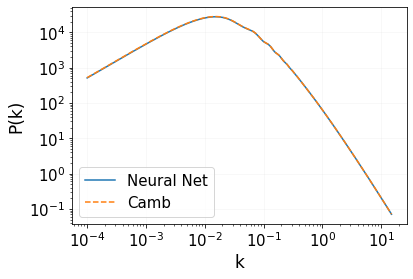

In [30]:
plt.loglog(kh, predicted_pk[0], "C0-", label="Neural Net")
plt.loglog(kh, output_pk_compare[0], "C1--", label="Camb")
plt.ylabel("P(k)", fontsize=17)
plt.xlabel("k", fontsize=17)
#plt.loglog(kh, output_pk_compare_1[0], "C2-.")
plt.legend(fontsize=15)
plt.grid(alpha=0.1)

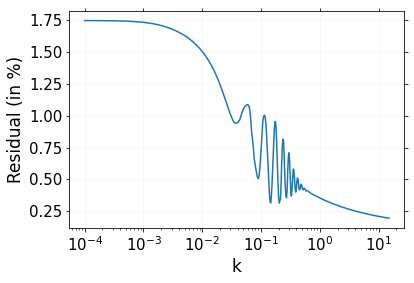

In [31]:
plt.plot(kh, np.abs((predicted_pk[0]-output_pk_compare[0])/output_pk_compare[0])*100)
#plt.plot(kh, np.abs((output_pk_compare_1[0]-output_pk_compare[0])/output_pk_compare[0])*100)
plt.xscale("log")
plt.ylabel("Residual (in %)", fontsize=17)
plt.xlabel("k", fontsize=17)
plt.grid(alpha=0.1)
plt.tick_params(top=True, right=True)

# ICA - Dimensionality reduction

In [17]:
from sklearn.decomposition import FastICA

Ncomponents = 5

transformer = FastICA(n_components=Ncomponents,
                        random_state=0,
                        max_iter=10000)

pk_transformed = transformer.fit_transform(input_pk)

yica_scaler = StandardScaler() #MinMaxScaler()

ica_scaled_output = yica_scaler.fit(pk_transformed)
                              
norm_ica_y = ica_scaled_output.transform(pk_transformed)
print(norm_ica_y.min(), norm_ica_y.max())

norm_ica_y = pd.DataFrame(norm_ica_y)

-5.1690787000063265 1.710190793805264


In [18]:
x_ica_train, x_ica_test, y_ica_train, y_ica_test = train_test_split(norm_x,
                                                                    norm_ica_y,
                                                                    test_size=0.2,
                                                                    random_state=1273)

print(np.shape(y_ica_test), np.shape(y_ica_train), np.shape(x_ica_test), np.shape(x_ica_train))


input_ica_dim = x_ica_train.shape[1]
output_ica_dim = Ncomponents

print(input_ica_dim, output_ica_dim)

(1600, 5) (6400, 5) (1600, 1) (6400, 1)
1 5


In [19]:
model_ica_nn = Sequential()
model_ica_nn.add(Dense(units=200, input_dim=input_ica_dim, kernel_initializer='normal', activation='relu'))
model_ica_nn.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
model_ica_nn.add(Dropout(0.1))
model_ica_nn.add(Dense(units=200, kernel_initializer='normal', activation='relu'))
model_ica_nn.add(Dropout(0.1))
model_ica_nn.add(Dense(output_ica_dim, kernel_initializer='normal'))

model_ica_nn.summary()

initial_learning_rate = 1e-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.1,
    staircase=True)


model_ica_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),#1e-3),
                 loss="mean_squared_error",
                 metrics="Accuracy")
history_ica_nn = model_ica_nn.fit(x_ica_train, y_ica_train, batch_size=100, epochs=250, verbose=1, validation_split=0.2) #validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 200)               400       
_________________________________________________________________
dense_9 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 1005      
Total params: 81,805
Trainable params: 81,805
Non-trainable params: 0
__________________________________________________

Epoch 48/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0123 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 49/250
52/52 [==============================] - 1s 12ms/step - loss: 0.0118 - accuracy: 1.2452e-05 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 50/250
52/52 [==============================] - 1s 12ms/step - loss: 0.0165 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 51/250
52/52 [==============================] - 1s 11ms/step - loss: 0.0139 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 52/250
52/52 [==============================] - 1s 11ms/step - loss: 0.0148 - accuracy: 7.9542e-05 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 53/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0118 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 54/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0109 - accuracy: 

52/52 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 103/250
52/52 [==============================] - 0s 10ms/step - loss: 0.0109 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 104/250
52/52 [==============================] - 1s 12ms/step - loss: 0.0092 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 105/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 106/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0094 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 107/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0095 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 108/250
52/52 [==============================] - 1s 11ms/step - loss: 0.0091 - accuracy: 0.0000e+

Epoch 156/250
52/52 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 157/250
52/52 [==============================] - 0s 10ms/step - loss: 0.0091 - accuracy: 0.0000e+00 - val_loss: 9.5044e-04 - val_accuracy: 0.0000e+00
Epoch 158/250
52/52 [==============================] - 1s 11ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 159/250
52/52 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 7.1820e-04 - val_accuracy: 0.0000e+00
Epoch 160/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 161/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 162/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0088

52/52 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 1.3173e-04 - val_accuracy: 0.0000e+00
Epoch 210/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 2.5631e-04 - val_accuracy: 0.0000e+00
Epoch 211/250
52/52 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 1.2366e-04 - val_accuracy: 0.0000e+00
Epoch 212/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0064 - accuracy: 0.0000e+00 - val_loss: 4.8048e-04 - val_accuracy: 0.0000e+00
Epoch 213/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0067 - accuracy: 0.0000e+00 - val_loss: 1.5118e-04 - val_accuracy: 0.0000e+00
Epoch 214/250
52/52 [==============================] - 1s 10ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 1.8522e-04 - val_accuracy: 0.0000e+00
Epoch 215/250
52/52 [==============================] - 1s 10ms/step - loss: 0.00

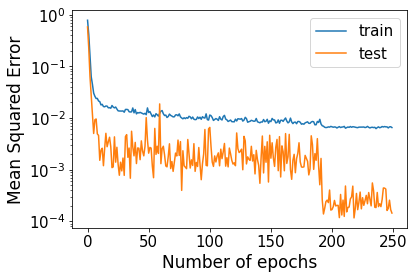

In [20]:
plt.plot(history_ica_nn.history["loss"], label="train")
plt.plot(history_ica_nn.history["val_loss"], label="test")
#plt.xlim([0, 500])
#plt.ylim([0, 0.15])
plt.xlabel("Number of epochs", fontsize=17)
#plt.ylabel("mean absolute error")
plt.ylabel("Mean Squared Error", fontsize=17)
plt.yscale("log")
plt.legend(fontsize=15)

In [32]:
s8_fid = 0.8129

HH0 = 72.9
new_H0 = np.reshape(np.array(HH0),(1, 1))
#scaled = xscaler.fit(h_lhs)
#input_scaled = scaled.transform(new_H0/100.0)
new_h = new_H0
input_scaled = scaled_input.transform(new_h)
print(input_scaled)
predicted_pk = ica_scaled_output.inverse_transform(model_ica_nn.predict([input_scaled]))
inverse_pk = transformer.inverse_transform(predicted_pk)

pars = camb.CAMBparams()
pars.set_cosmology(H0=HH0, ombh2=0.02242, omch2=0.11933)
pars.InitPower.set_params(As=2.105209331e-9, ns=0.9665)
pars.set_matter_power(redshifts=[0.0], kmax=15.0)
pars.set_dark_energy(w=-1.0, wa=0, dark_energy_model='fluid')

# Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, un_pk = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=Npoints)
s8_camb = np.array(results.get_sigma8())
Renorm_Factor = s8_fid**2/s8_camb**2
output_pk_compare_ica = Renorm_Factor * un_pk

[[0.33486146]]


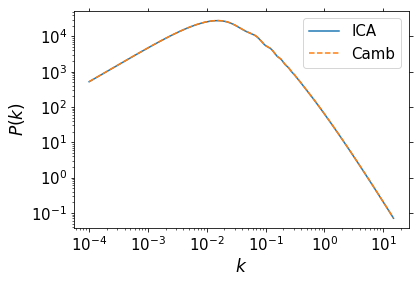

In [33]:
plt.loglog(kh, inverse_pk[0], "C0-", label="ICA")
plt.loglog(kh, output_pk_compare_ica[0], "C1--", label="Camb")
plt.ylabel("$P(k)$", fontsize=17)
plt.xlabel("$k$", fontsize=17)
plt.legend(fontsize=15)
plt.tick_params(top=True, right=True)

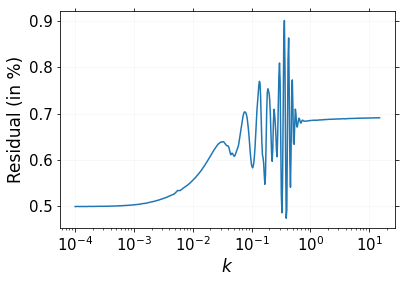

In [34]:
plt.plot(kh, np.abs((inverse_pk[0]-output_pk_compare_ica[0])/output_pk_compare_ica[0])*100)
plt.xscale("log")
plt.grid(alpha=0.1)
plt.ylabel("Residual (in %)", fontsize=17)
plt.xlabel("$k$", fontsize=17)
plt.tick_params(top=True, right=True)